### Fashion MNIST using CNN with Pytorch

### 1.Load Libraries

In [30]:
# torch loaded...!!!
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

# torchvision loaded...!!!
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary

# other libraries loaded...!!!
import time
import numpy as np
import matplotlib.pyplot as plt

### 2.Defining some constant

In [41]:
# Constant defined
NUM_EPOCHS = 10
BATCH_SIZE = 4
LEARNING_RATE = 0.001

### 3.Defining the transform

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
    ])

### 4.Download the Data and Load in to DataLoader

In [8]:
# Fashion-mnist dataset dataset : https://github.com/zalandoresearch/fashion-mnist
trainset = torchvision.datasets.FashionMNIST(root='./data_new', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data_new', train=False, download=True, transform=transform)

# Dataloader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

26422272it [00:07, 3572238.27it/s]                              


Extracting ./data_new\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data_new\FashionMNIST\raw



29696it [00:00, 214656.21it/s]                          


Extracting ./data_new\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data_new\FashionMNIST\raw



4422656it [00:01, 2733907.83it/s]                             


Extracting ./data_new\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data_new\FashionMNIST\raw



6144it [00:00, 6166500.07it/s]          

Extracting ./data_new\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data_new\FashionMNIST\raw




C:\Users\SHIVA\miniconda3\envs\pytorch19\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### 5.Visulization the images

![](https://i.imgur.com/KdAFXTE.gif)

In [9]:
classes = ['T-shirt', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag', 'AnkleBoot']

Image shape:torch.Size([4, 1, 28, 28])
Label shape:torch.Size([4])


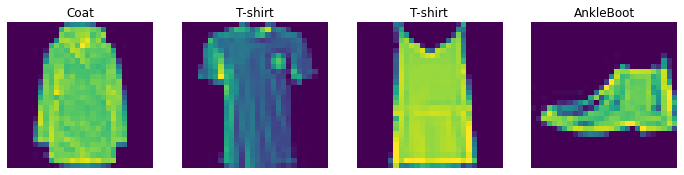

In [22]:
for batch_1 in trainloader:
    batch = batch_1
    break

print(f"Image shape:{batch[0].shape}") # Image pixels -> (batch, channel, height, width)
print(f"Label shape:{batch[1].shape}") # Label -> (batch, 1)

plt.figure(figsize=(12,10))
for i in range(batch[0].shape[0]):
    plt.subplot(1,4, i+1)
    plt.title(classes[batch[1][i]])
    plt.imshow(batch[0][i,0,:,:])
    plt.axis('off')
plt.show()

### 6. Build CNN Architecture

In [36]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, 
                               kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, 
                               kernel_size=5)
        self.fc1 = nn.Linear(in_features=256, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = LeNet()
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### 7.Display Model

In [37]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(str(summary(net.to(device), (1, 28, 28), depth=1, device=device)))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 24, 24]           156
├─Conv2d: 1-2                            [-1, 16, 8, 8]            2,416
├─Linear: 1-3                            [-1, 120]                 30,840
├─Linear: 1-4                            [-1, 84]                  10,164
├─Linear: 1-5                            [-1, 10]                  850
Total params: 44,426
Trainable params: 44,426
Non-trainable params: 0
Total mult-adds (M): 0.28
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.17
Estimated Total Size (MB): 0.21
Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 24, 24]           156
├─Conv2d: 1-2                            [-1, 16, 8, 8]            2,416
├─Linear: 1-3                            [-1, 120]                 30,840
├─Linear: 1-4                            [-1, 84]         

### 8.Loss Function and Optimizer

In [38]:
# Loss Function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.SGD(net.parameters(), lr=LEARNING_RATE, momentum=0.9)

### 9.Training

In [40]:
# function to calculate accuracy
def calc_acc(loader):
    correct = 0
    total = 0
    for data in loader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    return ((100 * correct)/ total)


In [42]:
def training():
    epoch_loss = []
    train_acc = []
    test_acc = []
    # 1. Number of epoches defined
    for epoch in range(NUM_EPOCHS):
        running_loss = 0.0
        # 2. Iterate over data from trainloader
        for i, data in enumerate(trainloader, 0):
            # 3. Get inputs and labels from data
            inputs, labels = data[0].to(device), data[1].to(device)
            
            # 4. Zero the gradient
            optimizer.zero_grad()
            
            # 5. Forward pass
            outputs = net(inputs)
            
            # 6. forward pass: compute loss
            loss = loss_fn(outputs, labels)
            
            # 7. backward pass: compute gradient
            loss.backward()
            
            # 8. update weights
            optimizer.step()
            
            # 9. statistics
            running_loss += loss.item()
            
        epoch_loss.append(running_loss)
        train_acc.append(calc_acc(trainloader))
        test_acc.append(calc_acc(testloader))
        print('Epoch: %d of %d, Train Acc: %0.3f, Test Acc: %0.3f, Loss: %0.3f'
              % (epoch+1, NUM_EPOCHS, train_acc[epoch], test_acc[epoch], running_loss/15000))
        
    return epoch_loss, train_acc, test_acc
            
    

In [44]:
start = time.time()
epoch_loss, train_acc, test_acc = training()
end = time.time()

print("%0.2f Minutes" %((end-start)/60))

Epoch: 1 of 10, Train Acc: 85.565, Test Acc: 84.210, Loss: 0.448
Epoch: 2 of 10, Train Acc: 87.103, Test Acc: 85.790, Loss: 0.356
Epoch: 3 of 10, Train Acc: 88.820, Test Acc: 87.430, Loss: 0.319
Epoch: 4 of 10, Train Acc: 89.725, Test Acc: 88.050, Loss: 0.296
Epoch: 5 of 10, Train Acc: 90.102, Test Acc: 87.970, Loss: 0.279
Epoch: 6 of 10, Train Acc: 91.237, Test Acc: 89.110, Loss: 0.264
Epoch: 7 of 10, Train Acc: 90.547, Test Acc: 88.400, Loss: 0.250
Epoch: 8 of 10, Train Acc: 91.503, Test Acc: 88.840, Loss: 0.241
Epoch: 9 of 10, Train Acc: 91.218, Test Acc: 88.730, Loss: 0.231
Epoch: 10 of 10, Train Acc: 91.853, Test Acc: 88.790, Loss: 0.222
14.76 Minutes


The loss is around 0.222 by the end of 10 epochs. Surely, it is not state of the art result, but it is not bad for such a simple network also. The training accuracy is above 91.853 % and the test accuracy is around 88.790 %. A bigger network will surely help in getting better results.

### 10.Plot the Loss and Accuracy

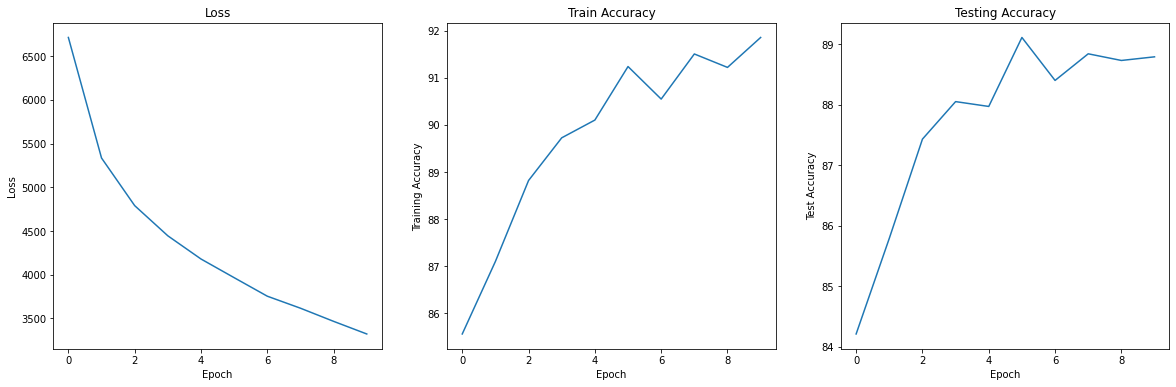

In [58]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.plot(epoch_loss)
plt.title("Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,3,2)
plt.plot(train_acc)
plt.title("Train Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')

plt.subplot(1,3,3)
plt.plot(test_acc)
plt.title("Testing Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.show()